In [42]:
#importing required libraries
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from matplotlib import pyplot as plt

In [43]:
#importing cmc dataset
dataset = pd.read_csv("CMC.csv")
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1].values

In [44]:
#printing first five columns of dataset
dataset.head()

,age,edu_wife,edu_husband,children,religion,working,job_husband,living_std,media,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [45]:
#scaling the input variables
from sklearn.preprocessing import  MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [46]:
#Correlation table to see if any of the variables are highly correlated
dataset.corr()

,age,edu_wife,edu_husband,children,religion,working,job_husband,living_std,media,contraceptive
age,1.000000,-0.048011,-0.052879,0.540126,-0.139543,-0.039880,-0.202532,0.184485,0.113306,-0.162953
edu_wife,-0.048011,1.000000,0.618369,-0.193839,-0.232973,-0.062200,-0.395921,0.361450,-0.336080,0.149777
edu_husband,-0.052879,0.618369,1.000000,-0.187513,-0.178447,0.001099,-0.337003,0.357490,-0.288691,0.103226
children,0.540126,-0.193839,-0.187513,1.000000,0.073917,0.097316,-0.023000,-0.006046,0.133658,0.082772
religion,-0.139543,-0.232973,-0.178447,0.073917,1.000000,0.069837,0.084417,-0.196308,0.060243,-0.025271
working,-0.039880,-0.062200,0.001099,0.097316,0.069837,1.000000,0.014232,-0.076505,0.001828,0.054438
job_husband,-0.202532,-0.395921,-0.337003,-0.023000,0.084417,0.014232,1.000000,-0.293831,0.113925,0.018161
living_std,0.184485,0.361450,0.357490,-0.006046,-0.196308,-0.076505,-0.293831,1.000000,-0.251359,0.091149
media,0.113306,-0.336080,-0.288691,0.133658,0.060243,0.001828,0.113925,-0.251359,1.000000,-0.119206
contraceptive,-0.162953,0.149777,0.103226,0.082772,-0.025271,0.054438,0.018161,0.091149,-0.119206,1.000000


In [47]:
#splitting datset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [48]:
#making a instance of naive bayes classifier 
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
#expected value and predictions
expected = y_test
predicted = model.predict(X_test)

In [50]:
#Classification report and confusion matrix
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           1       0.60      0.36      0.45       153
           2       0.39      0.64      0.48        84
           3       0.48      0.50      0.49       132

    accuracy                           0.47       369
   macro avg       0.49      0.50      0.47       369
weighted avg       0.51      0.47      0.47       369

[[55 45 53]
 [12 54 18]
 [25 41 66]]


In [51]:
#importing the required libraries for using k fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [52]:
# sample cross validation for k=14
scores = cross_val_score(model, X, y, cv=14)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.54716981 0.45283019 0.47169811 0.3490566  0.48113208 0.54716981
 0.43396226 0.44761905 0.5047619  0.42857143 0.45714286 0.49038462
 0.41346154 0.51456311]


In [53]:
#Making a dictionary with k values as keys and mean of cross validation score as values
s={}
for i in range(2,31):
    scores = cross_val_score(model, X, y, cv=i+1)
    s[i]=scores.mean()
    i=i+1

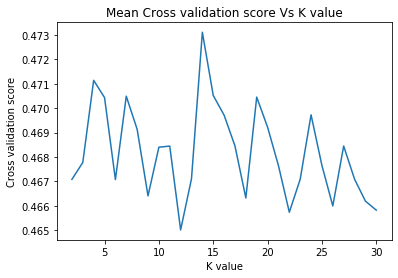

In [54]:
#We have plotted Cross Validation Score Vs K values to find best value of k, k=14 gives best cross validation score and is stable
fig, ax = plt.subplots()
lists = sorted(s.items())
x, y = zip(*lists) 
ax.plot(x, y)
ax.set_xlabel('K value')
ax.set_ylabel('Cross validation score')
ax.set_title('Mean Cross validation score Vs K value')
plt.show()